# Проект: классификация

## 0. Постановка задачи

Вам предоставили данные о последней маркетинговой кампании, которую проводил банк: задачей было привлечь клиентов для открытия депозита. Вы должны проанализировать эти данные, выявить закономерность и найти решающие факторы, повлиявшие на то, что клиент вложил деньги именно в этот банк. Если вы сможете это сделать, то поднимете доходы банка и поможете понять целевую аудиторию, которую необходимо привлекать путём рекламы и различных предложений.

**Бизнес-задача**: определить характеристики, по которым можно выявить клиентов, более склонных к открытию депозита в банке, и за счёт этого повысить результативность маркетинговой кампании.

**Техническая задача** для вас как для специалиста в Data Science: построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать, воспользуется он предложением об открытии депозита или нет.

Макро-задачи:
- Исследуйте данные, а не просто вычисляйте метрики и создавайте визуализации.
- Попробуйте выявить характерные черты для потенциальных клиентов, чтобы чётко очертить ЦА и увеличить прибыль банка.
- Проявляйте фантазию и используйте разные инструменты для повышения качества прогноза.

### Организационная информация

1. **Первичная обработка данных**

    В рамках этой части вам предстоит обработать пропуски и выбросы в данных. 
    Это необходимо для дальнейшей работы с ними.

1. **Разведывательный анализ данных (EDA)**

    Вам необходимо будет исследовать данные, нащупать первые закономерности и выдвинуть гипотезы.

1. **Отбор и преобразование признаков**

    На этом этапе вы перекодируете и преобразуете данные таким образом, чтобы их можно было использовать при решении задачи классификации. 
    Если на первом этапе вы лишь избавите данные от ненужных артефактов, то на этом шаге совершите действия, более важные для подготовки данных к задаче классификации, уже понимая их структуру.

1. **Решение задачи классификации: логистическая регрессия и решающие деревья**

    На данном этапе вы построите свою первую прогностическую модель и оцените её качество. 
    Вы научитесь подбирать оптимальные параметры модели для того, чтобы получить наилучший результат для конкретного алгоритма.
    
1. **Решение задачи классификации: ансамбли моделей и построение прогноза**

    На заключительном этапе вы сможете доработать своё предсказание с использованием более сложных алгоритмов и оценить, с помощью какой модели возможно сделать более качественные прогнозы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

Какие данные нам предоставили?

**Данные о клиентах банка:**

- age (возраст);
- job (сфера занятости);
- marital (семейное положение);
- education (уровень образования);
- default (имеется ли просроченный кредит);
- housing (имеется ли кредит на жильё);
- loan (имеется ли кредит на личные нужды);
- balance (баланс).

**Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:**

- contact (тип контакта с клиентом);
- month (месяц, в котором был последний контакт);
- day (день, в который был последний контакт);
- duration (продолжительность контакта в секундах).

**Прочие признаки:**

- campaign (количество контактов с этим клиентом в течение текущей кампании);
- pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
- previous (количество контактов до текущей кампании)
- poutcome (результат прошлой маркетинговой кампании).

И, разумеется, наша целевая переменная **deposit**, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.

### Задание 1

In [2]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


None

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

Только признак `balance` содержит явные пропуски: 25

### Задание 2

НО, надо учесть, что пропущенные (неизвестные) значения могут присутствовать неявным образом. 
Это значит, что они могут быть закодированы каким-то словом или набором символов. 
Часто это не является проблемой, но это необходимо выявить.

In [4]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

В датасете `job` неизвестные данные обозначены меткой `'unknown'`

### Задание 3

Обратите внимание на признак balance: в данных содержится лишняя запятая и знак доллара. 
По этой причине этот признак не считывается как число. 
Обработайте данные этого признака так, чтобы он был преобразован в тип float.

In [5]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
display(df['balance'].value_counts())

df['balance'] = df['balance'].str.replace(',','.')
df['balance'] = df['balance'].str.replace('$','')
df['balance'] = df['balance'].str.replace(' ', '')
df['balance'] = df['balance'].astype(float)

display(df['balance'].describe())
mean_balance = df['balance'].mean()
print(f'Mean balance: {mean_balance:.3f}')


balance
0  $            774
 1,00 $          39
 3,00 $          34
 2,00 $          34
 4,00 $          29
               ... 
 1 641,00 $       1
 5 517,00 $       1
 8 332,00 $       1
 4 859,00 $       1
-134,00 $         1
Name: count, Length: 3802, dtype: int64

count    11137.000000
mean      1529.129029
std       3228.114892
min      -6847.000000
25%        123.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

Mean balance: 1529.129


### Задание 4

Итак, значения в признаке balance приобрели нормальный вид, и теперь мы можем обработать пропуски, которые в нём присутствуют. Конечно, пропуски можно было бы просто удалить, но мы поступим по-другому: заменим пропуски на медианное значение по этому признаку.

In [6]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку

df.loc[df['balance'].isna(),'balance'] = df['balance'].median()
mean_balance = df['balance'].mean()
print(f'Mean balance: {mean_balance:.3f}')

Mean balance: 1526.936


### Задание 5

Ранее мы выяснили, что в признаке job есть пропущенные значения, которые не отображаются как пропуски в явном виде. Однако нам всё равно важно их обработать. Мы знаем, что для категориальных признаков пропущенные значения заменяются модой по данному признаку.

Замените все пропущенные значения в признаке job на модальные. То же самое сделайте с признаком, отвечающим за уровень образования.

In [7]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
df.loc[df['job']=='unknown', 'job'] = df['job'].mode()[0]
df.loc[df['education']=='unknown', 'education'] = df['education'].mode()[0]

# После замены пропусков рассчитайте средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование). 
# Ответ округлите до трёх знаков после точки-разделителя.
mean_balance = df[
    (df['job'] == df['job'].mode()[0]) &\
        (df['education'] == df['education'].mode()[0])
]['balance'].mean()
print(f'Mean balance: {round(mean_balance,3)}')

Mean balance: 1598.883


NOTE: не забывать убеждаться, что идёт присвоение конкретного числа, а не Series, иначе ответ может быть неверным

### Задание 6

Изучите признак, отображающий баланс клиентов, на предмет выбросов.

В математической статистике есть несколько подходов, позволяющих определить наличие выбросов. Мы будем считать, что выбросы находятся за пределами отрезка, нижняя граница которого определяется как нижний квартиль, из которого вычли полтора межквартильных размаха (Q1-1.5IQR) , а верхняя граница — как верхний квартиль, к которому прибавили полтора межквартильных размаха. (Q3 + 1.5IQR). Найдите эти границы, и отфильтруйте значения так, чтобы выбросов в данных не осталось.

Примечание. Несмотря на то что существуют более продвинутые методы поиска аномальных значений, для обработки одного числового признака достаточно хорошо подходит метод Тьюки. После решения задачи вы сможете попробовать применить и другие методы, оценив их влияние на качество поиска.

In [8]:
# удалите все выбросы для признака balance
def get_tukey_outliers(series: pd.Series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    
    return (q1 - 1.5*iqr, q3 + 1.5*iqr)

balance_boundaries = get_tukey_outliers(df['balance'])
print(f'Low balance boundary: {balance_boundaries[0]}')
print(f'High balance boundary: {balance_boundaries[1]}')

df = df[(df['balance']>=balance_boundaries[0]) & (df['balance']<=balance_boundaries[1])]
df.info()

Low balance boundary: -2241.0
High balance boundary: 4063.0
<class 'pandas.core.frame.DataFrame'>
Index: 10105 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10105 non-null  int64  
 1   job        10105 non-null  object 
 2   marital    10105 non-null  object 
 3   education  10105 non-null  object 
 4   default    10105 non-null  object 
 5   balance    10105 non-null  float64
 6   housing    10105 non-null  object 
 7   loan       10105 non-null  object 
 8   contact    10105 non-null  object 
 9   day        10105 non-null  int64  
 10  month      10105 non-null  object 
 11  duration   10105 non-null  int64  
 12  campaign   10105 non-null  int64  
 13  pdays      10105 non-null  int64  
 14  previous   10105 non-null  int64  
 15  poutcome   10105 non-null  object 
 16  deposit    10105 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


## Часть 2:  Разведывательный анализ

- исследовать данные;
- попробовать найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими для оформления депозита;
- дополнить ваш анализ визуализациями, иллюстрирующими ваше исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.

### Задание 1

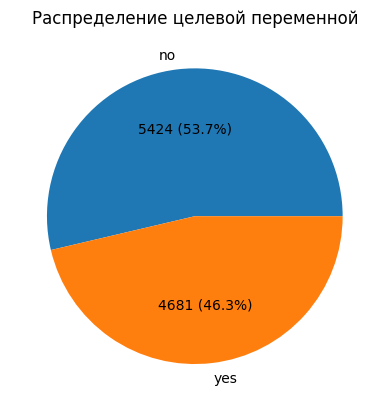

In [21]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат

data = df['deposit'].value_counts()
labels = data.index.values
plt.pie(x=df['deposit'].value_counts(), labels=labels, autopct=lambda p: f'{p*data.sum()/100:.0f} ({p:.1f}%)')
plt.title('Распределение целевой переменной');

### Задания 2 и 3

Начнём с описательных статистик для количественных переменных.

- Рассчитайте их и продумайте подробную интерпретацию.
- Попробуйте описать данные, которые у вас есть, увидеть первые зависимости.
- Рассмотрите минимальные и максимальные значения.
- Посмотрите на меры разброса и оцените, насколько данные вариативны.
- Сравнив меры центральной тенденции, сделайте выводы о том, есть ли аномальные значения с меньшей или большей стороны.
- Дополните выводы визуализациями. Вспомните, какие диаграммы могут помочь в иллюстрации распределений количественных данных.

In [ ]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10105.0,40.895497,11.734931,18.0,32.0,38.0,48.0,95.0
balance,10105.0,807.653538,994.151966,-2049.0,95.0,445.0,1227.0,4063.0
day,10105.0,15.590302,8.441510,1.0,8.0,15.0,22.0,31.0
duration,10105.0,368.742603,346.651524,2.0,137.0,252.0,490.0,3881.0
campaign,10105.0,2.517170,2.707159,1.0,1.0,2.0,3.0,43.0
pdays,10105.0,51.319644,109.644179,-1.0,-1.0,-1.0,2.0,854.0
previous,10105.0,0.816230,2.243795,0.0,0.0,0.0,1.0,58.0


Age - возраст в 95 лет близок к аномальному, имеет смысл проверить на выбросы. Поможет boxplot.
Campaign, duration, pdays и previous явно имеют выбросы.
Вообще, все числовые признаки интересно изучить с точки зрения распределения в зависимости от принятого/не принятого предложения.

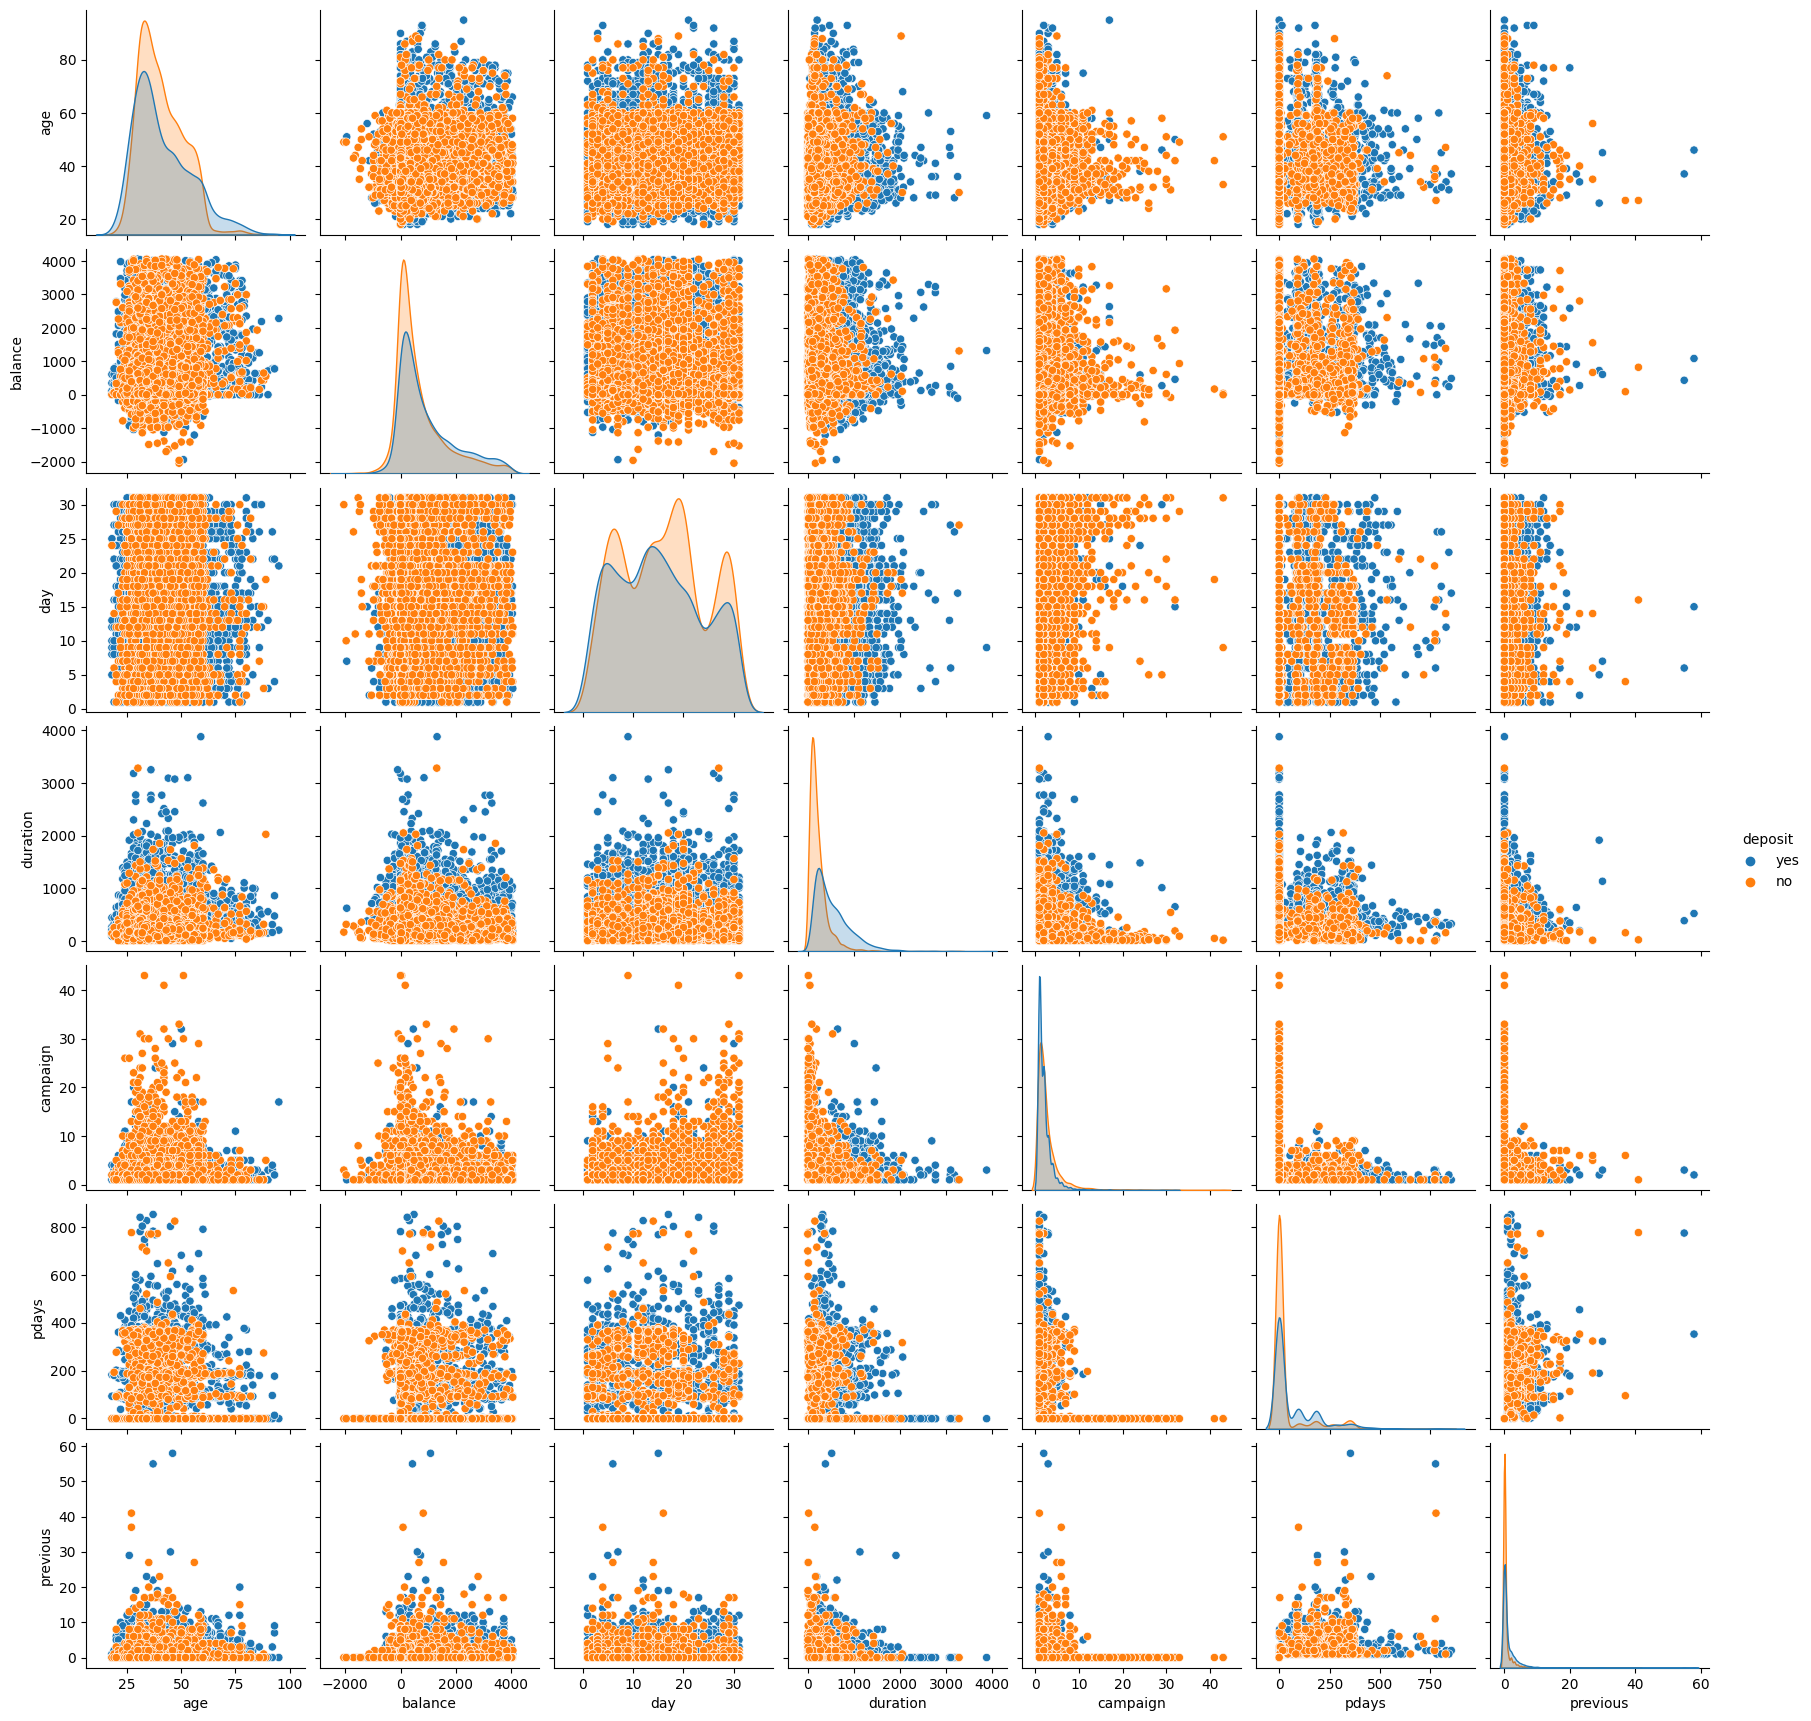

In [81]:
sns.pairplot(df, hue='deposit')

БОльшая часть признаков имеет близкое к логнормальному распределению.

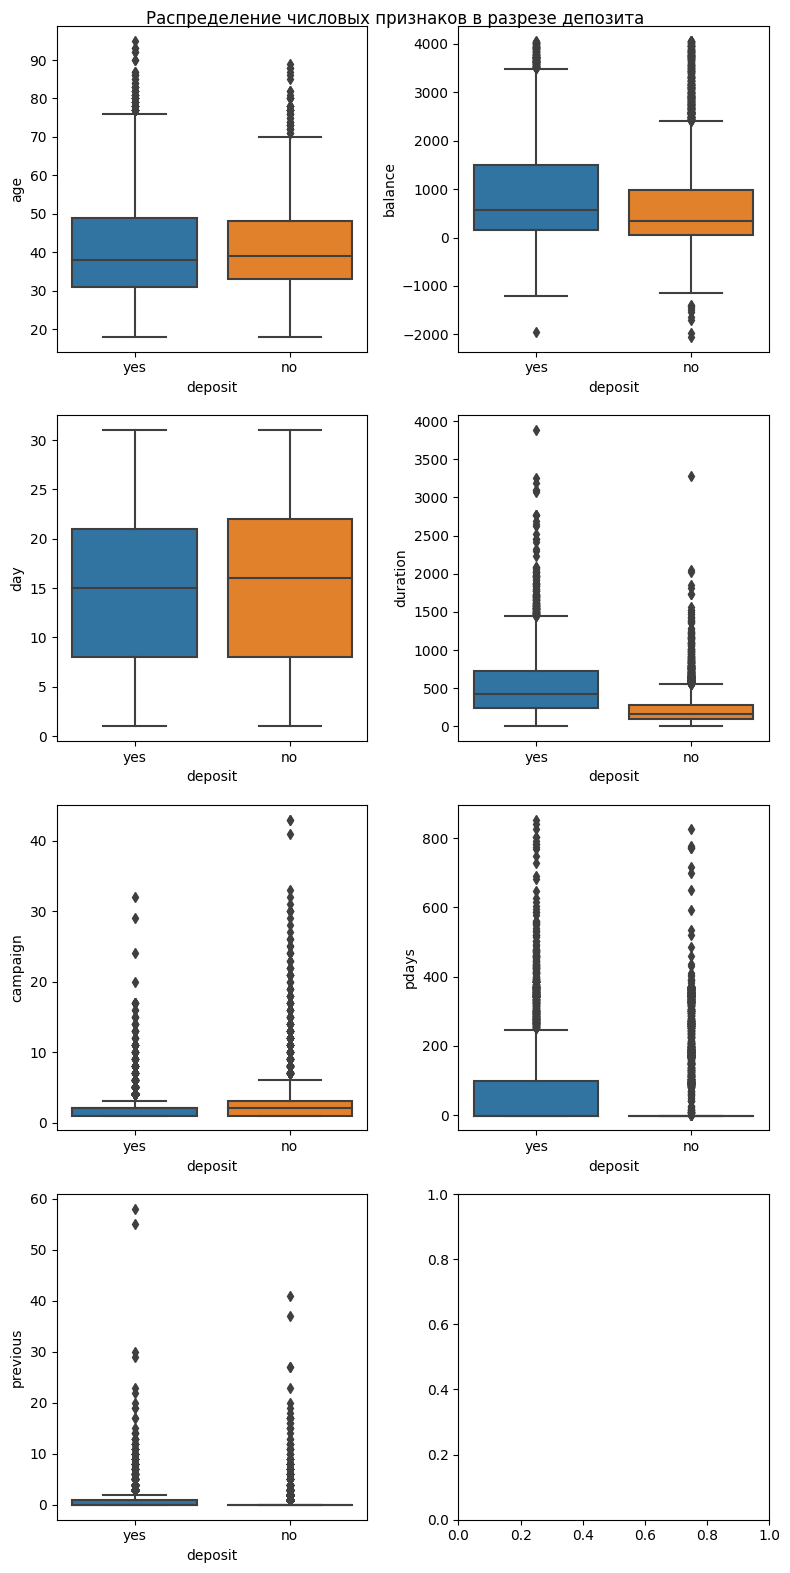

In [75]:
# Get numerical columns names
num_columns = list(df.select_dtypes(include=[np.int64, np.float64]).columns)

# Plot boxplots for all numerical columns
fig, axes = plt.subplots(len(num_columns)//2+1, 2, figsize=(8,16))
for ax, column in zip(axes.flat, num_columns):
    sns.boxplot(df, x='deposit', y=column, ax=ax)
fig.suptitle('Распределение числовых признаков в разрезе депозита');
fig.tight_layout()

Мы видим слабую корреляцию возраста и депозита.

- Чуть больше зависимость с балансом - бОльший баланс, больше шанс, что примут предложение.
- Большая продолжительность разговора - больше шанс принятия предложения.
- БОльшее число кампаний - меньше шанс, что депозит возьмут.
- Когда проходит бОльшее число дней между звонками, клиенты охотнее соглашаются на предложение.

Проверим также корреляцию между числовыми признаками

<Axes: >

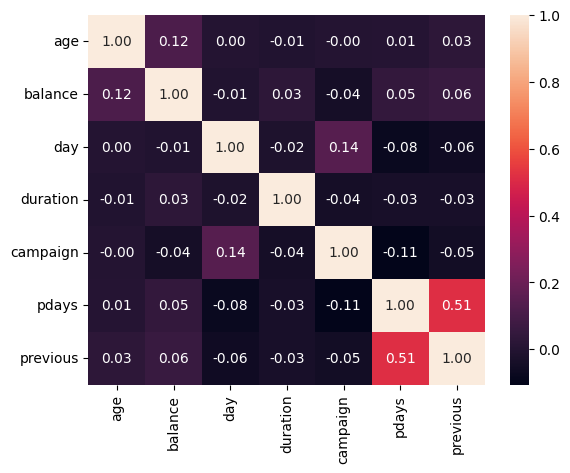

In [80]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')

Есть умеренная корреляция между pdays и previous. Мультиколлинеарные признаки не обнаружены.

### Задания 4 и 5

Теперь давайте рассмотрим описательные статистики для категориальных переменных.

Попробуйте извлечь максимум информации из тех показателей, которые можете получить. Сколько всего сфер занятости представлено среди клиентов банка? В каждый ли месяц проходила маркетинговая кампания? Какое семейное положение встречается чаще всего? А образование? Постарайтесь дать достаточно подробную интерпретацию. Для лучшей наглядности добавьте визуализации по каждой категориальной переменной.

Совет. Вопросы, приведённые выше, — это лишь пример того, что можно рассмотреть. Постарайтесь самостоятельно составить различные выводы и описать их. Сделайте информативные и красивые визуализации, дополняющие ваши выводы.

In [82]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
df.describe(include='object').T

#постройте визуализации, иллюстрирующие результаты

,count,unique,top,freq
job,10105,11,management,2315
marital,10105,3,married,5715
education,10105,3,secondary,5517
default,10105,2,no,9939
housing,10105,2,no,5243
loan,10105,2,no,8712
contact,10105,3,cellular,7283
month,10105,12,may,2617
poutcome,10105,4,unknown,7570
deposit,10105,2,no,5424


<Axes: ylabel='count'>

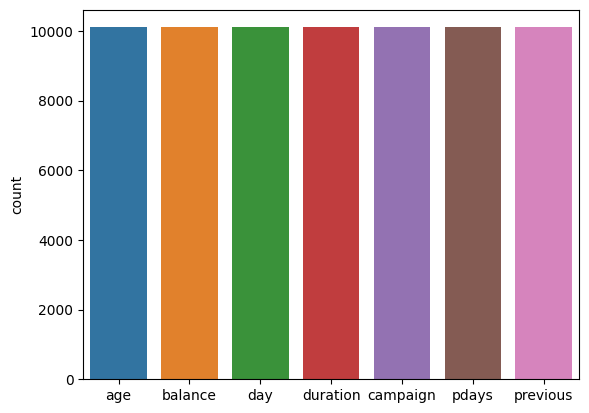

In [84]:
countplot?

### Задание 6

In [ ]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код

### Задание 7

In [ ]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код

### Задание 8

In [ ]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

### Задания 9 и 10

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости

### Задание 11

In [ ]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

## Часть 3: преобразование данных

### Задание 1

In [ ]:
# преобразуйте уровни образования

### Задания 2 и 3

In [ ]:
# преобразуйте бинарные переменные в представление из нулей и единиц

### Задание 4

In [ ]:
# создайте дамми-переменные

### Задания 5 и 6

In [ ]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

### Задания 7 и 8

In [3]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [ ]:
# рассчитайте необходимые показатели

### Задание 9

In [ ]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

### Задание 10

In [ ]:
# нормализуйте данные с помощью minmaxsxaler

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [ ]:
# обучите логистическую регрессию и рассчитайте метрики качества

### Задания 2,3,4

In [ ]:
# обучите решающие деревья, настройте максимальную глубину

### Задание 5

In [ ]:
# подберите оптимальные параметры с помощью gridsearch

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [4]:
# обучите на ваших данных случайный лес

### Задания 2 и 3

In [ ]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

### Задание 4

In [ ]:
# объедините уже известные вам алгоритмы с помощью стекинга 

### Задание 5

In [ ]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

### Задания 6,7,8

In [ ]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna